<a href="https://colab.research.google.com/github/MaicolFranco/Prediction_Credit_Card/blob/main/Copia_de_Credit_Card_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **About Dataset**
Un gerente del banco está perturbado porque cada vez más clientes abandonan sus servicios de tarjeta de crédito. Realmente apreciarían si uno pudiera predecir para ellos quién será criticado para que puedan acudir de manera proactiva al cliente para brindarles mejores servicios y convertir a los clientes' decisiones en la dirección opuesta.

https://www.kaggle.com/datasets/whenamancodes/credit-card-customers-prediction?resource=download



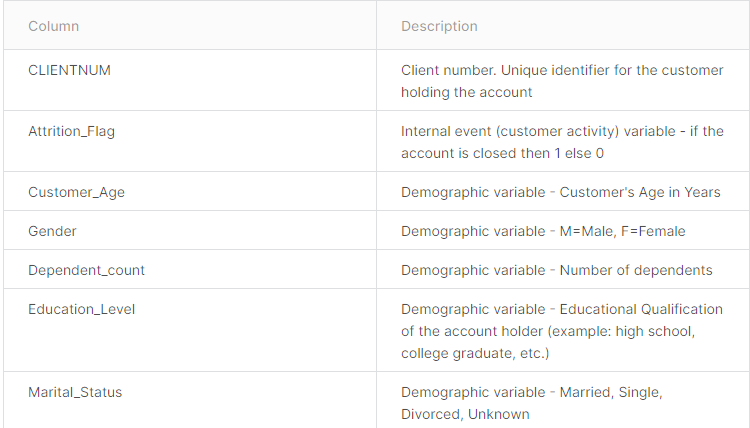 




# **Correspondientes Importaciones**

In [2]:
#importaciones correspondientes
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,)
from xgboost import XGBClassifier
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use("seaborn")

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data Scientist/MACHINE LEARNING/Week_8/Files/BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
print(f"Data Types:\n{df.dtypes}")
print(f"\nRows and Columns:\n{df.shape}")
print(f"\nColumn Names:\n{df.columns}")
print(f"\nNull Values %:\n{df.apply(lambda x: sum(x.isnull()) / len(df))}")
print(f"\nUnknown Values %:\n{df.apply(lambda x: sum(x=='Unknown') / len(df))}")

Data Types:
CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         o

 `Remarks:`
* Este conjunto de datos incluye 18 características (edad, sexo, salario anual, estado civil, límite de tarjeta de crédito, etc.) de un total de 10 127 clientes bancarios y una variable objetivo (cliente existente frente a cliente perdido) que indica si la cuenta está cerrada o no. 

* Mi principal interés es en el campo del marketing de inteligencia artificial y, a través de este proyecto, quiero descubrir qué acciones suelen preceder a la pérdida de un cliente o una oportunidad de venta, y comprender exactamente qué factores influyen en la retención de clientes.

* Ahora analizaremos los datos para captar lo que tenemos. Usaré pandas.crosstab para obtener vistas entre nuestro objetivo Attrition_Flag y otras características categóricas.

In [5]:
#Modelo de clasificación
target = df['Attrition_Flag']
target.value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

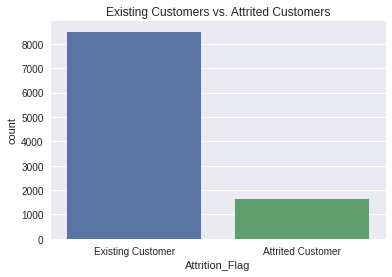

In [6]:
%matplotlib inline
plt.title('Existing Customers vs. Attrited Customers')
sns.countplot(x=target);

El gráfico anterior muestra que la proporción de clientes existentes y perdidos para la columna Attrition_Flag está seriamente desequilibrada. Tendremos que trabajar mucho en ello pronto.

In [7]:
pd.crosstab(df['Gender'], df['Attrition_Flag'], margins = True, margins_name = "Total")

Attrition_Flag,Attrited Customer,Existing Customer,Total
Gender,,,
F,930,4428,5358
M,697,4072,4769
Total,1627,8500,10127


930 mujeres y 697 son clientes perdidos. Ahora necesitamos ver cuántos hombres vs. mujeres contiene más nuestro conjunto de datos. Necesitamos comprender cuál es la probabilidad de que el cliente abandone de toda la población. para esto necesitamos probabilidades.

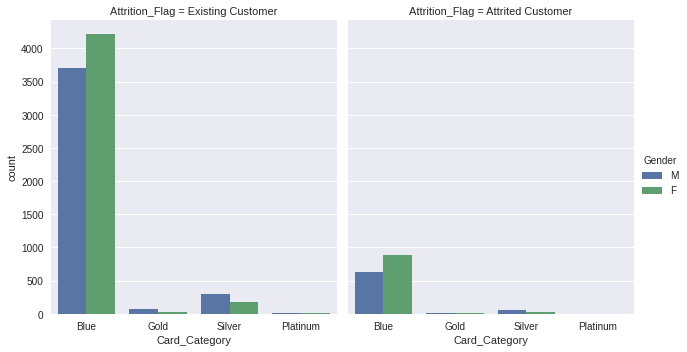

In [8]:
sns.catplot(x="Card_Category", hue="Gender", col="Attrition_Flag",
                data=df, kind="count",
                height=5, aspect=.9);

este grafico es muy interesante pero aun asi sigamos adentrandonos mas a nuestros datos

In [9]:
# Eliminar las dos últimas columnas innecesarias
df = df.iloc[:, :-2]


# **Data Inconsistencies For Categorical Values**

In [10]:
# Verificar el número de valores únicos para cada columna
for col in df:
    print(col, df[col].nunique())

CLIENTNUM 10127
Attrition_Flag 2
Customer_Age 45
Gender 2
Dependent_count 6
Education_Level 7
Marital_Status 4
Income_Category 6
Card_Category 4
Months_on_book 44
Total_Relationship_Count 6
Months_Inactive_12_mon 7
Contacts_Count_12_mon 7
Credit_Limit 6205
Total_Revolving_Bal 1974
Avg_Open_To_Buy 6813
Total_Amt_Chng_Q4_Q1 1158
Total_Trans_Amt 5033
Total_Trans_Ct 126
Total_Ct_Chng_Q4_Q1 830
Avg_Utilization_Ratio 964


In [11]:
for i in df.loc[:, df.dtypes == object].columns:
    print(i,":",df[i].unique())

Attrition_Flag : ['Existing Customer' 'Attrited Customer']
Gender : ['M' 'F']
Education_Level : ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status : ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category : ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category : ['Blue' 'Gold' 'Silver' 'Platinum']


In [12]:
pd.set_option('display.max_columns', None)


In [13]:
check_colums = []
non_numericas = []
def check_numerical_value(col):
    try:
        col_max = df[col].max()
        col_min = df[col].min() 
        if col_min < 0:
            print(f"In the col**** {col}*** there is at leat a value under 0 ******* check!")
            check_colums.append({col +"_min": col_min})
        if col_max > 1:
            print(f"In the col **** {col} **** there is at leat a value over 1 it makes sense? *********** check!")
            check_colums.append({col + "_max": col_max})
        else:
            print(f"the next numerical col seem not to present incosistencies: {col}")
    except:
        non_numericas.append(col)
        print(f"---------column {col} not checked - not numerical col ----------------")

In [14]:
for column in non_numericas:
    print("\n", column, df[column].unique())

# **Manejo de valores faltantes y duplicados**

In [15]:
len(df[df['Education_Level']=='Unknown'])

1519

In [16]:
len(df[df['Marital_Status']=='Unknown'])


749

In [17]:
len(df[df['Income_Category']=='Unknown'])


1112

nivel educativo, el estado civil y la categoría de ingresos no se eliminan porque hay más de 1000 filas marcadas como Desconocido. Si es necesario más adelante, Desconocido se reemplazará con el valor promedio.

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


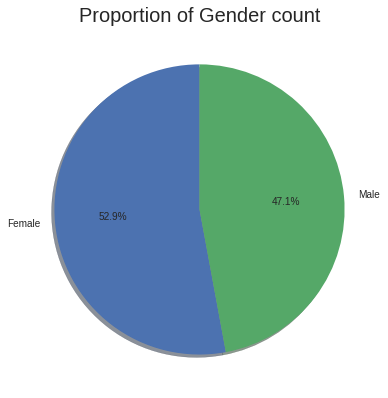

In [19]:
genders = df.Gender.value_counts()
plt.figure(figsize = (6.5,7))
plt.pie(df['Gender'].value_counts(), labels = ['Female', 'Male'], autopct='%1.1f%%', shadow = True, startangle = 90)
plt.title('Proportion of Gender count', fontsize = 20)
plt.show()

# **Ingeneria de caracteristicas**

In [20]:
def engineer(df):
    # promedio de transacción
    df['Avg_Trans_Amt'] = df['Total_Trans_Amt']/df['Total_Trans_Ct']
    
 # Para las funciones categóricas que tienen un orden, codificación ordinal utilizando el mapeo por adelantado

 # (1) Categoría de ingresos ('Menos de $40K' < '$40K - $60K' < '$60K - $80K' < '$80K - $120K' < '$120K +', 'Desconocido' se establece en 0 cómo)
    Income_dict = {'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K' : 3, '$80K - $120K': 4, '$120K +': 5, 'Unknown': 0}
    df["Income_Ordinal"] = df['Income_Category'].map(Income_dict)
    
    # (2) Card Category ('Blue' < 'Silver' < 'Gold' < 'Platinum')
    Card_dict = {'Blue': 1, 'Silver': 2, 'Gold' : 3, 'Platinum': 4}
    df["Card_Ordinal"] = df['Card_Category'].map(Card_dict)
        
    # (3) Education Level ('Uneducated' < 'High School' < 'College' < 'Graduate' < 'Post-Graduate' < 'Doctorate', 'Unknown'은 0으로 대체)
    Educ_dict = {'Uneducated': 1, 'High School': 2, 'College' : 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6, 'Unknown': 0}
    df["Educ_Ordinal"] = df['Education_Level'].map(Educ_dict)
    
    df = df.drop(['Income_Category', 'Card_Category', 'Education_Level', 'CLIENTNUM', ], axis=1)
    # Conviertir el valor objetivo en un número binario de 0 o 1 para facilitar el modelado futuro (Cliente existente = 0, Cliente retirado = 1)
    df.loc[df.Attrition_Flag == 'Existing Customer', 'Attrition_Flag'] = 0
    df.loc[df.Attrition_Flag == 'Attrited Customer', 'Attrition_Flag'] = 1
    df = df.astype({'Attrition_Flag': np.int64})
    
    return df

df = engineer(df)

In [21]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Avg_Trans_Amt,Income_Ordinal,Card_Ordinal,Educ_Ordinal
0,0,45,M,3,Married,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,27.238095,3,1,2
1,0,49,F,5,Single,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,39.121212,1,1,4
2,0,51,M,3,Married,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,94.350000,4,1,4
3,0,40,F,4,Unknown,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,58.550000,1,1,2
4,0,40,M,3,Married,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,29.142857,3,1,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Marital_Status            10127 non-null  object 
 5   Months_on_book            10127 non-null  int64  
 6   Total_Relationship_Count  10127 non-null  int64  
 7   Months_Inactive_12_mon    10127 non-null  int64  
 8   Contacts_Count_12_mon     10127 non-null  int64  
 9   Credit_Limit              10127 non-null  float64
 10  Total_Revolving_Bal       10127 non-null  int64  
 11  Avg_Open_To_Buy           10127 non-null  float64
 12  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 13  Total_Trans_Amt           10127 non-null  int64  
 14  Total_

In [23]:
#fig, axes = plt.subplots(1,3, figsize = (14,7))
#axes = axes.ravel()
#continuous_features = df.select_dtypes(['float64']).columns.to_list()
#for cont_feature in enumerate(continuous_features[3:6]):
 #   axes[cont_feature].bar(continuous_features['float64']), continuous_features[col]                             
  #  axes[cont_feature].title({col})
    

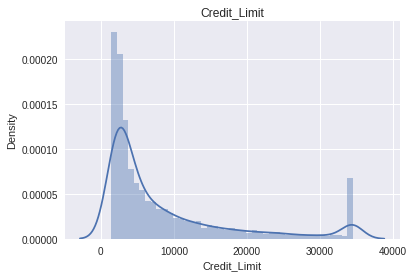

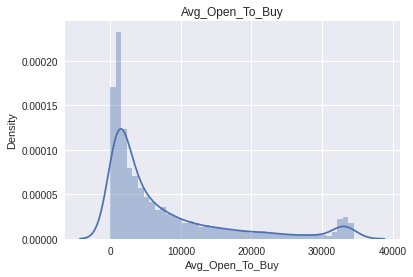

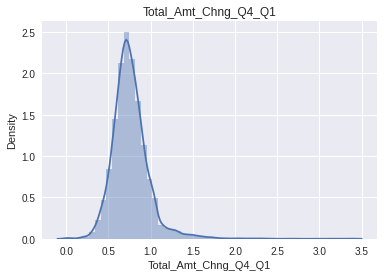

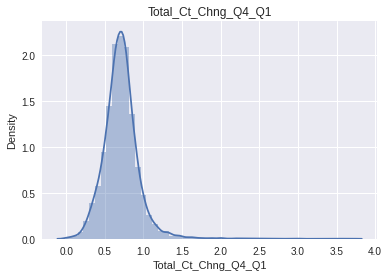

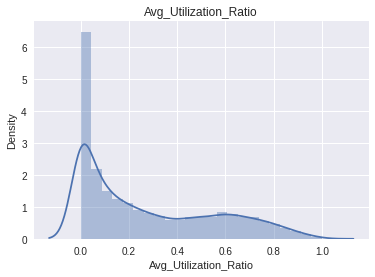

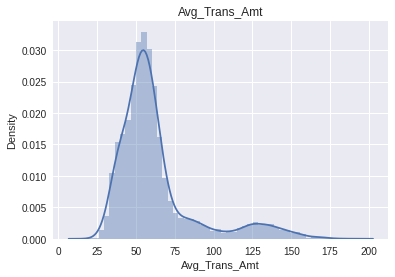

In [24]:
# Continuous Features
continuous_features = df.select_dtypes(['float64']).columns.to_list()

for cont_feature in continuous_features: 
    plt.figure()
    plt.title(cont_feature)
    ax = sns.distplot(df[cont_feature])

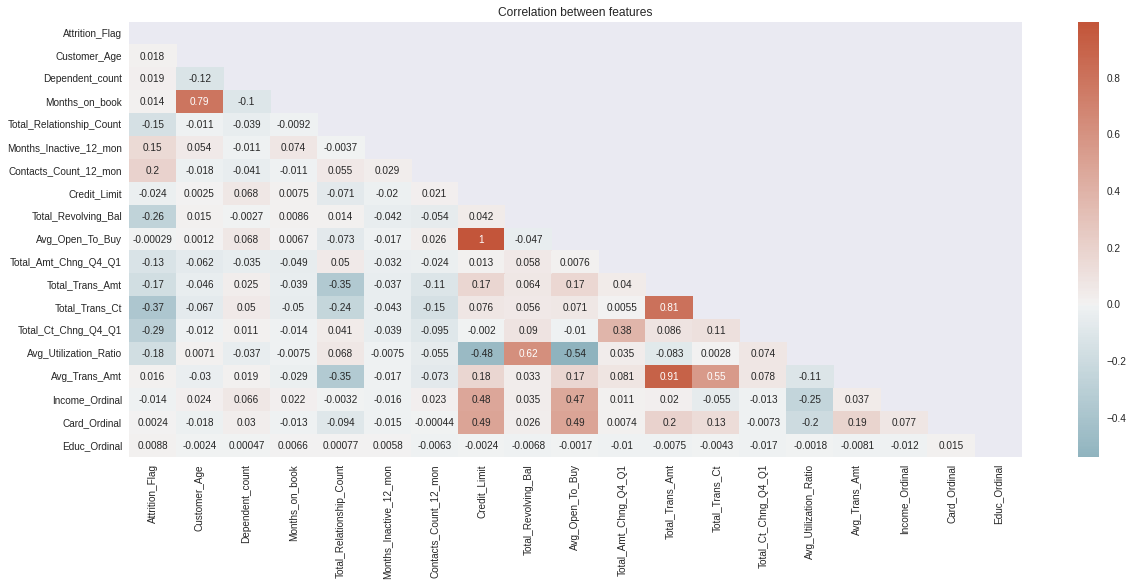

In [25]:
plt.figure(figsize=(20,8))
plt.title("Correlation between features")
mask = np.zeros_like(np.array(df.corr()))
mask[np.triu_indices_from(mask)] = True
sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(df.corr(), cmap=sns.diverging_palette(220, 20, as_cmap=True), mask=mask, annot=True, center = 0);

 **Positivicas Correlaciones:**

* Credit Limit, Avg Open To Buy (1)
* Total Trans Amt, Avg Trans Amt (0.91)
* Total Trans Ct, Total Trans Amt (0.81)
* Months On Book, Customer Age (0.79)
* Avg Utilization Ratio, Total Revolving Bal (0.62)
* Income Ordinal, Credit Limit (0.57)
* Income Ordinal, Avg Open To Buy (0.56)
* Total Trans Ct, Avg Trans Amt (0.55)
* Card Ordinal, Credit Limit (0.49)

 **Negative Correlations:**

* Avg Utilization Ratio, Avg Open To Buy (-0.54)
* Credit Limit, Avg Utilization Ratio (-0.48)
* Total Relationship Count, Total Trans Amount (-0.35)
* Total Relationship Count, Total Avg Amount (-0.35)
* Avg Utilization Ratio, Income Ordinal (-0.33)

In [26]:
#separate features from labels
X = df.drop(['Attrition_Flag'],axis=1)
y = df['Attrition_Flag']

# **Modelos**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(7088, 20) (3039, 20)


In [28]:
#Creación de datos codificados con One_Hot
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

# **DecisionTree**

In [45]:
Model_tree = DecisionTreeClassifier( random_state=1)
Model_tree.fit(X_train, y_train)
tre_pred = Model_tree.predict(X = X_test)
accuracy_dt = accuracy_score(y_test, tre_pred)
print("Accuracy:"+str(accuracy_dt))
print(classification_report(y_test, tre_pred))

Accuracy:0.9437314906219151
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2551
           1       0.82      0.83      0.83       488

    accuracy                           0.94      3039
   macro avg       0.89      0.90      0.90      3039
weighted avg       0.94      0.94      0.94      3039



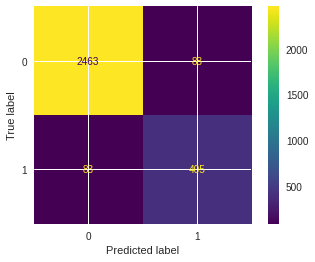

In [48]:
from sklearn import metrics
metrics.plot_confusion_matrix(Model_tree, X_test, y_test)

# **RandomForest**

In [30]:
Model_random = RandomForestClassifier(random_state=1)
Model_random.fit(X_train,y_train)
Model_pred = Model_random.predict(X_test)
accuracy_rfr = accuracy_score(y_test, Model_pred)
print("Accuracy:"+str(accuracy_rfr))


Accuracy:0.9664363277393879


# **XGB**

In [31]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train, y_train)
xgbPreds = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, xgbPreds)
print("Accuracy:"+str(accuracy_xgb))

Accuracy:0.9687397170121751
